# Проект " Анализ оттока клиентов и подготовка плана действий по удержанию клиентов"


Задача — провести анализ и подготовить план действий по удержанию клиентов фитнес клуба на основе поступившиз данных:
*   прогнозировать вероятность оттока для каждого клиента;

•	сформировать типичные портреты клиентов;

•	проанализировать основные признаки, наиболее сильно влияющие на отток;

•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

	

## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 


In [2]:
# прочитаем данные и сохраним в переменной
try:
    data = pd.read_csv('C:\Dev\Jupyter\dist\projects\Проект машинное обучение\gym_churn.csv')
except:

    data = pd.read_csv('/datasets/gym_churn.csv')
# выведем первые 5 строк на экран    
display(data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


* Промежуточный вывод

Необходимые для работы библиотеки вызваны. Данные заказчика для анализа сохранены в переменной и выведены на экран. 

### Подготовка данных к работе


In [3]:
# выведем размер данных
data.shape

(4000, 14)

In [4]:
# выведем общую информацию 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# приведём названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

# выведем первые 5 строк на экран    
display(data.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


*Промежуточный вывод

Данные содержат 4000 строк и 14 колонок: 10колонок - типа int  и 4 колонки - типа float

пропусков в данных нет

наименования колонок приведены к нижнему регистру.

# Исследовательский анализ данных (EDA)


 ## Анализ отсутствующик признаков,  средних значений и стандартных отклонений.

In [6]:
# выведем основные показатели данных в колонках
data.describe()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


*Промежуточный вывод

Отсутствующих признаков и неправдоподобных выбросов в данных нет. 


* Портрет среднестатистического клиента:

это преимущественно мужчина,

работает или живёт радом с фитнес-центром,

возраст 29 лет,

приобретает абонемент на один месяц,

среднее количество посещений до 2 раз в неделю.

## Анализ средних значений признаков в группах тех, кто ушел в отток и тех, кто остался.

In [7]:
# выведем сдедние значения признаков
data.groupby(by='churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


*Промежуточный вывод

Средние значения в группах тех, кто ушёл и тех кто остался по данным пользователей: 

*gender - отток по гендерному признаку практически не отличается;

*near_location - отток  незначительно меньше тех, кто остался;

*partner - отток ниже в 1.5 раза количества тех кто остался;

*promo_friends - отток ниже тех кто остался почти в 2 раза.



## Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


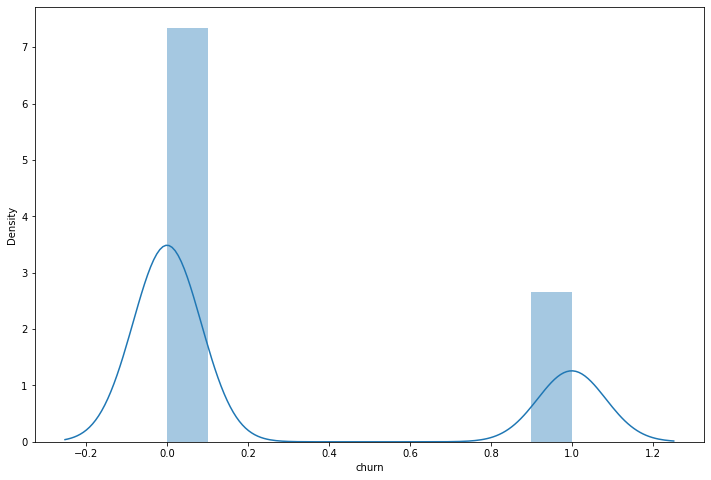

In [8]:
# гистограмма целевой переменной
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['churn'], bins=10)
plt.show() 


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


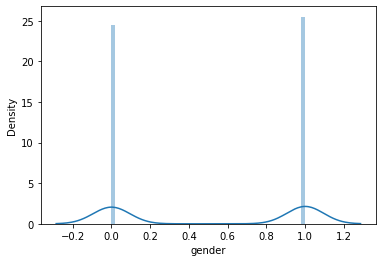

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


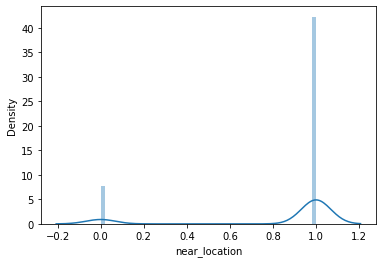

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


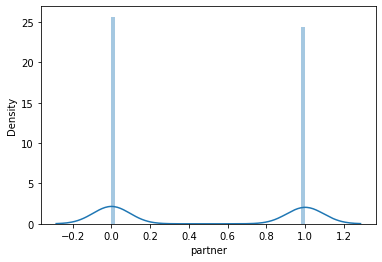

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


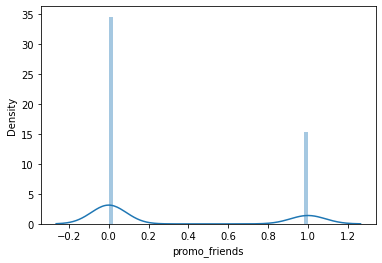

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


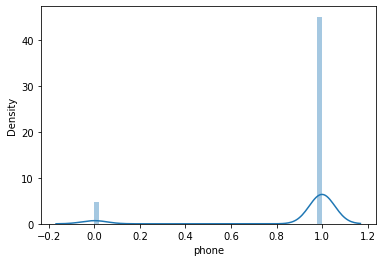

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


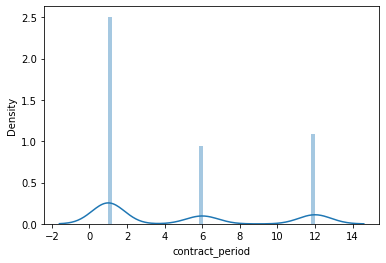

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


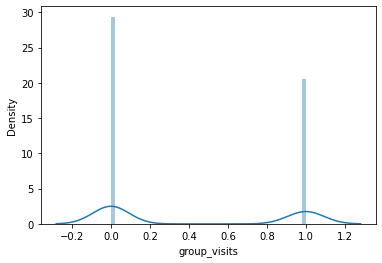

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


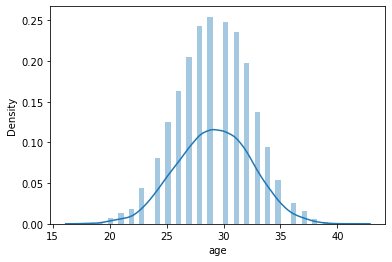

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


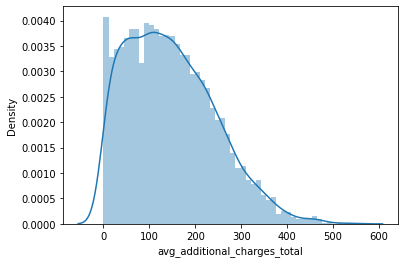

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


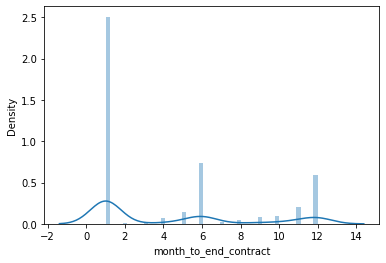

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


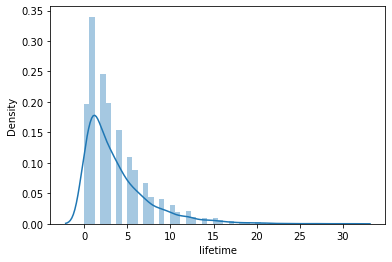

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


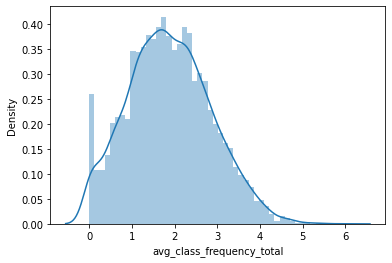

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


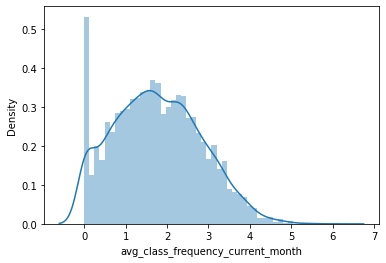

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


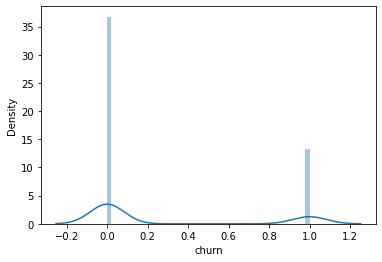

In [9]:
# выведем распределение признаков
for value in data.columns:
    sns.distplot(data[value], bins=50)
    plt.show() 


*Промежуточный вывод

Анализ распределений признаков показал:

*состав посетителей по гендерному признаку примерно одинаковый;

*основная масса клиентов живут или работают недалеко от фитнес-центра;

*среди посетителей почти столько же сотрудников компаний партнёров сколько и людей "с улицы";

*пришли в центр по приглашению друзей каждый третий клиент;

*основная масса клиентов предоставила контактный номер телефона;

*наиболее популярны абонементы на месяц;

*групповые визиты несколько менее популярны среди посетителей фитнес-центра;

*возраст основной массы клиентов - 27-31 год;

*суммарная выручка от прочих услуг центра имеет пик в области нуля;

*срок окончания абонемента имеет максимальное значение на отметке в 1 месяц;

*Пик срока жизни клиента в центре - от одного до 2 месяцев, но есть и "долгожители"- более 30 месяцев;

*наиболее предпочтительна посетителями средняя частота 1-2 раза в неделю;

*средняя частота посещений в неделю в предыдущем месяце имеет пик на нулевой отметке;

*около 1/4 клиентов попали в отток в текущем месяце.


### Матрица корреляций .

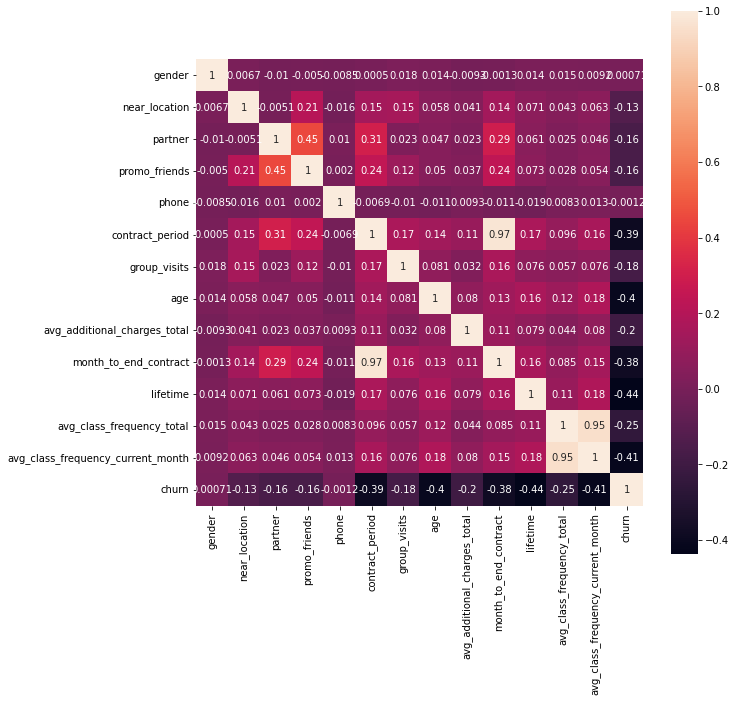

In [10]:
#построим и отрисуем матрицу корреляций
cm = data.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (10,10))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) #ваш код здесь

plt.show()



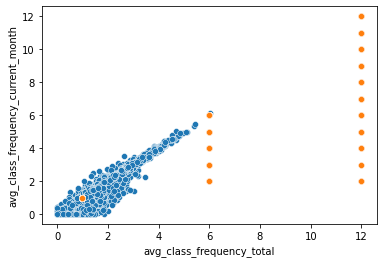

In [11]:
# выведем грфик признаков, которые  сильно коррелируют между собой 
sns.scatterplot(x=data['avg_class_frequency_total'], y=data['avg_class_frequency_current_month']) 

sns.scatterplot(x=data['contract_period'], y=data['month_to_end_contract']) 
plt.show()

*Промежуточный вывод

Сильная корреляция наблюдается между признаками avg_class_frequency_total и avg_class_frequency_current_month, а так же между contract_period и month_to_end_contract.Возможно это обусловлено схожей природой признаков. Пока оставим эти признаки в работе.


# Модель прогнозирования оттока клиентов


## Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [12]:
# разделим м данные на признаки (матрица x) и целевую переменную (y)
y = data['churn']
x = data.drop('churn', axis = 1)

In [13]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify = y)


In [14]:
#X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0,2, random_state = 42, stratify = y)

### Обучим модель на train-выборке  способом логистической регрессии.

In [15]:
# зададим алгоритм для  модели
model = LogisticRegression(solver='liblinear')


In [16]:
# обучим модель
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [17]:
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)





### Обучим модель на train-выборке  способом на основе алгоритма случайного леса.

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)



StandardScaler()

In [19]:
# зададим алгоритм для  модели на основе алгоритма случайного леса 
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)


# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)# Ваш код здесь



### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

In [20]:
#  выведем метрики для логистической регресии
print('Accuracy_lr: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision_lr: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall_lr: {:.2f}'.format(recall_score (y_test, predictions)))



Accuracy_lr: 0.93
Precision_lr: 0.89
Recall_lr: 0.84


In [21]:
#  выведем метрики для алгоритма случайного леса
print('Accuracy_rf: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision_rf: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall_rf: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Accuracy_rf: 0.92
Precision_rf: 0.88
Recall_rf: 0.83


* Промежуточный вывод

Построеная модель бинарной классификации  обучена двумя способами:

*способом логистической регрессии и

*с помощью алгоритма случайного леса.

Выведены метрики accuracy, precision и recall. Результаты модели при обучении способом логистической регрессии показали лучший результат.

# Кластеризация клиентов


## Стандартизируем данные.

In [22]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 

In [23]:
# обучаем нормализатор и преобразуем набор данных
x_sc = scaler.fit_transform(x)  
# выведем матрицу на экран
print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

## Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и  дендрограммы. 


In [24]:
# в переменной linked сохраним таблицу «связок» 
linked = linkage(x_sc, method = 'ward')
#выведем матрицу
print(linked[:10])

[[9.70000000e+01 3.22200000e+03 1.00990653e-01 2.00000000e+00]
 [2.61000000e+02 3.17900000e+03 1.22634574e-01 2.00000000e+00]
 [8.90000000e+02 1.75000000e+03 1.28123291e-01 2.00000000e+00]
 [2.10100000e+03 3.77300000e+03 1.44188037e-01 2.00000000e+00]
 [7.50000000e+01 1.64600000e+03 1.46525871e-01 2.00000000e+00]
 [8.16000000e+02 3.69600000e+03 1.70199121e-01 2.00000000e+00]
 [7.60000000e+02 8.59000000e+02 1.71727874e-01 2.00000000e+00]
 [6.80000000e+02 2.12300000e+03 1.74355420e-01 2.00000000e+00]
 [5.47000000e+02 3.88400000e+03 1.81090979e-01 2.00000000e+00]
 [8.01000000e+02 3.23800000e+03 1.82143847e-01 2.00000000e+00]]


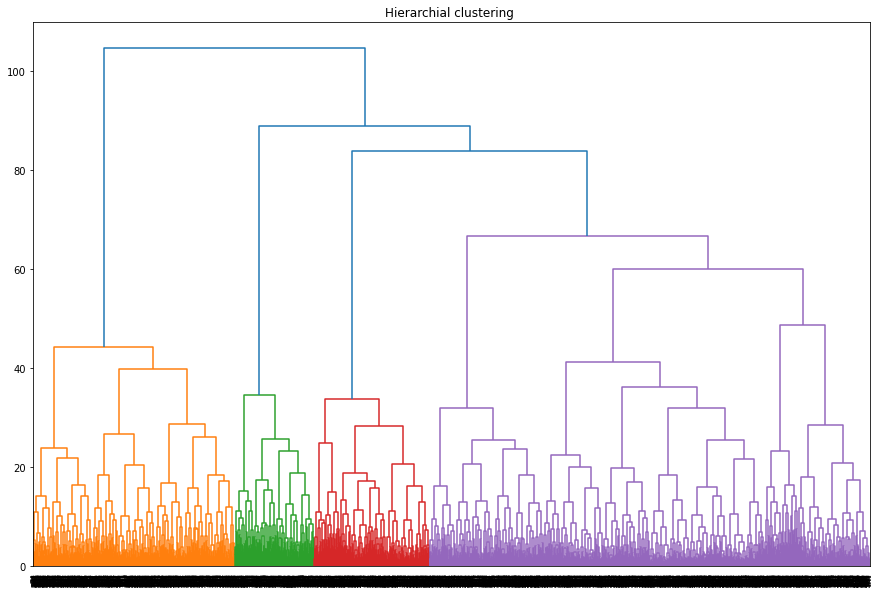

In [25]:
# отрисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering ')
plt.show() 


* Промежуточный вывод

Для кластеризации проведена трансформация данных с помощью созданного и обученного нормализатора, информация о связях сохранена в переменной linked. На её основе построеноа дендрограмма. Воображаемая линия на уровне отметки 60  пересекла ветви дендрограммы 5 раз- в наших целях такой глубины кластеризации вполне достаточно.Число кластеров примем  n=5.

## Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 


In [26]:

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(x)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений 
labels =  km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
display(data.groupby('cluster').mean())




,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


## Построим распределения признаков для кластеров.


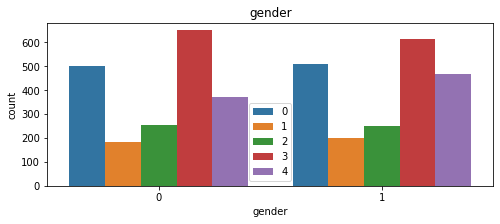

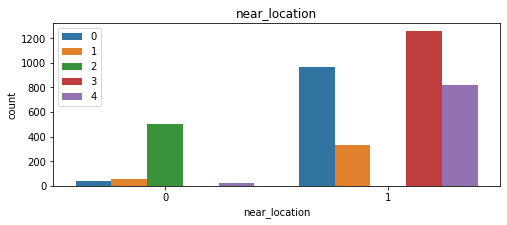

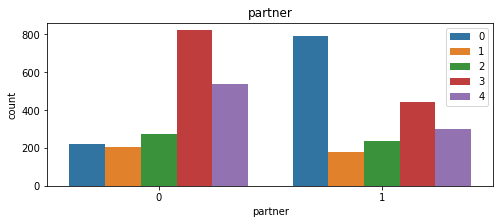

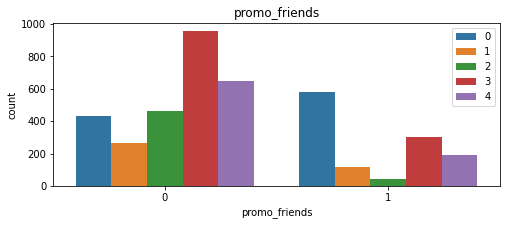

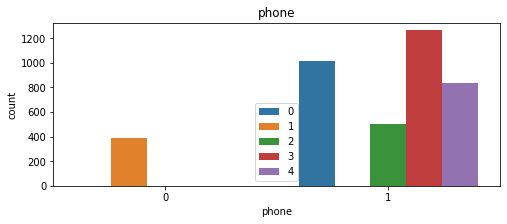

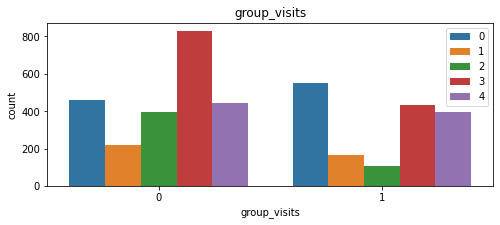

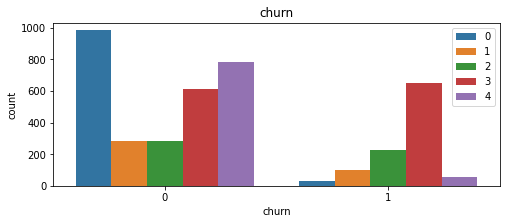

In [27]:
categorical_columns = ['gender','near_location','partner','promo_friends','phone','group_visits','churn']
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=data[column], hue="cluster", data=data)
    plt.title(column)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

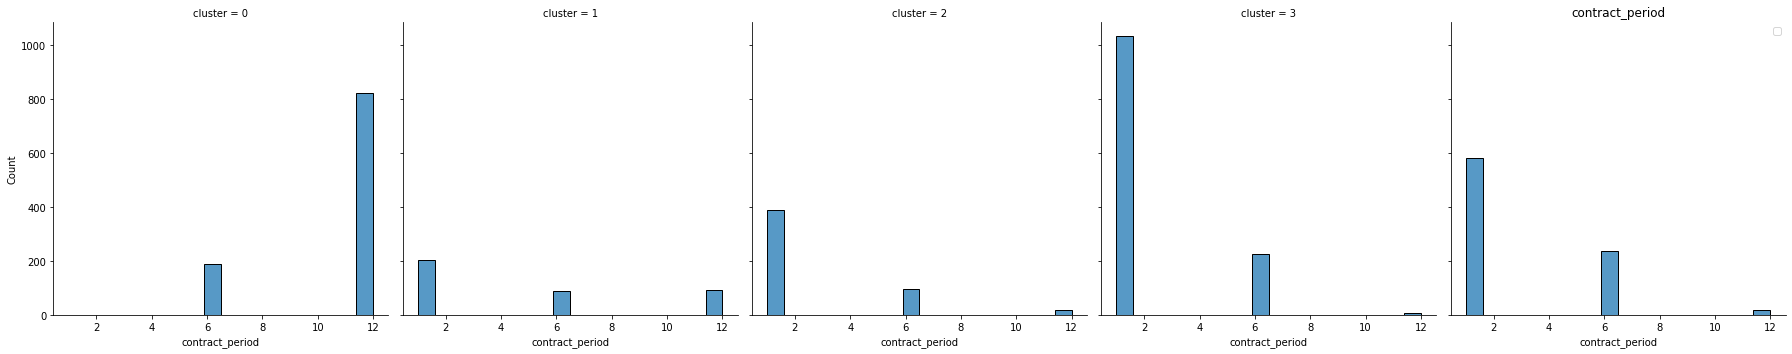

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

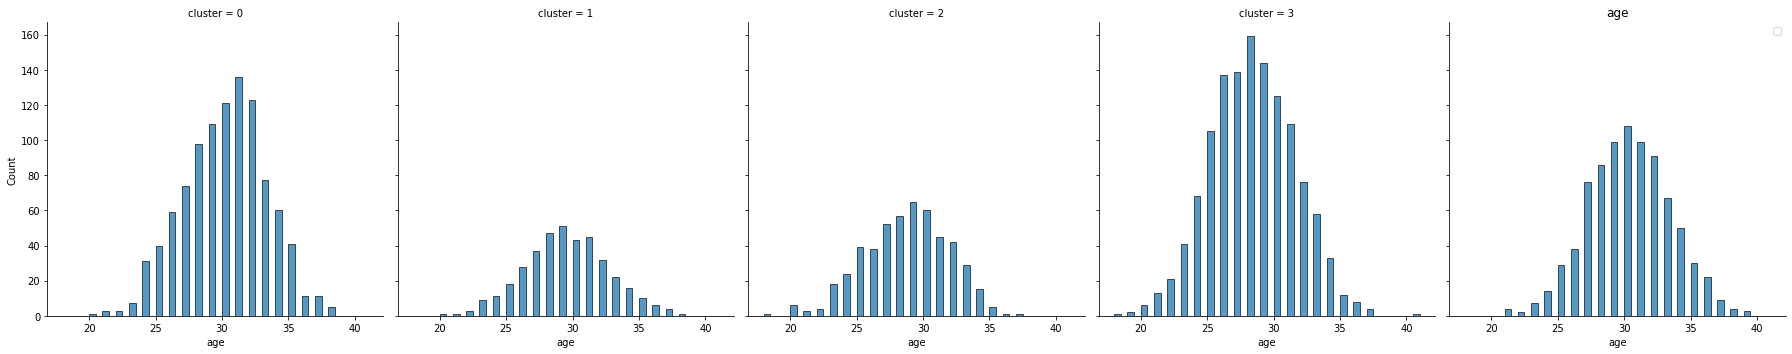

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

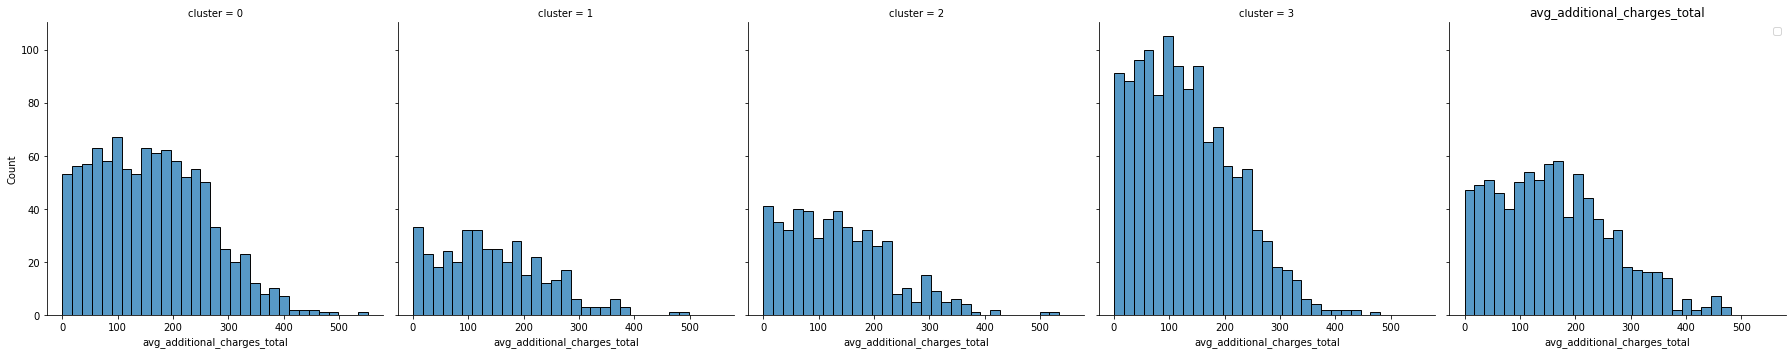

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

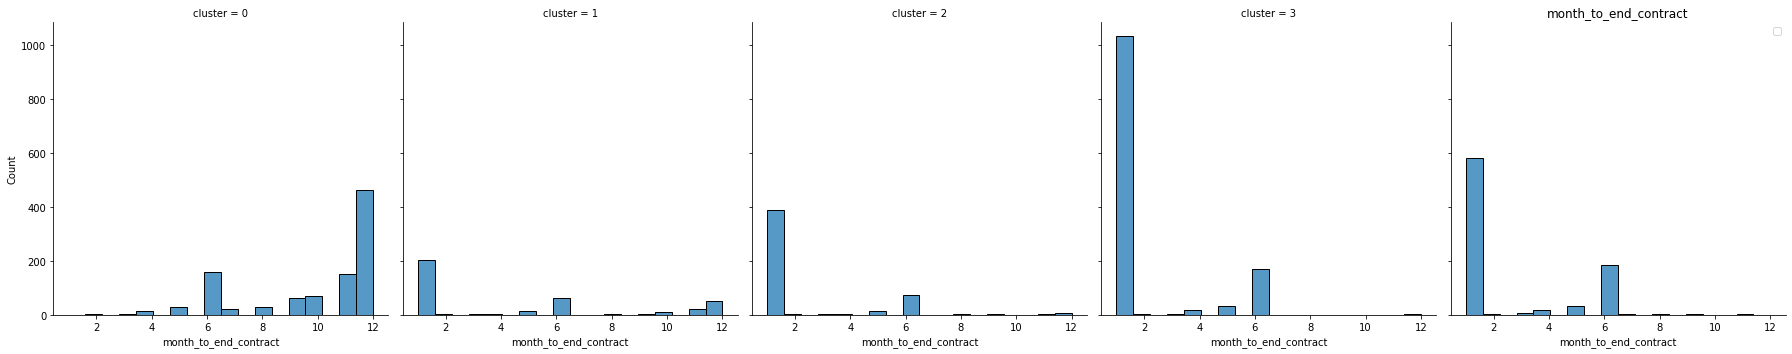

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

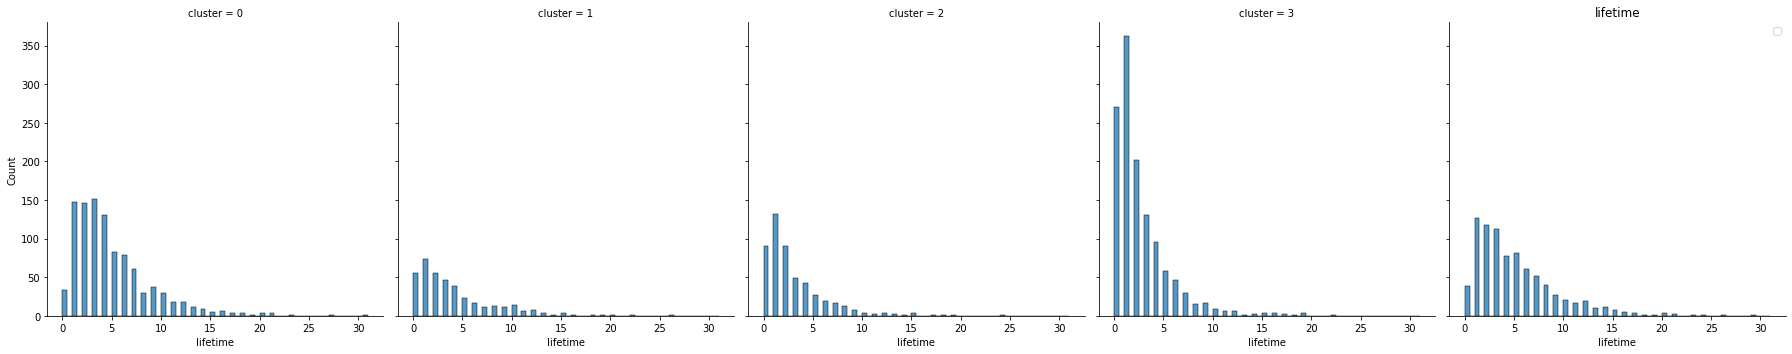

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

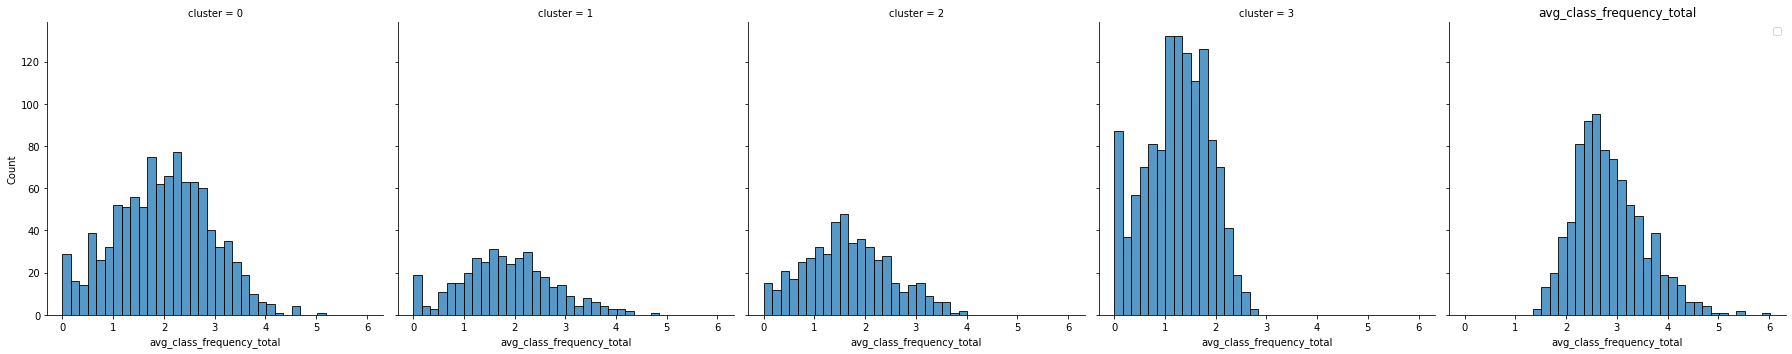

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

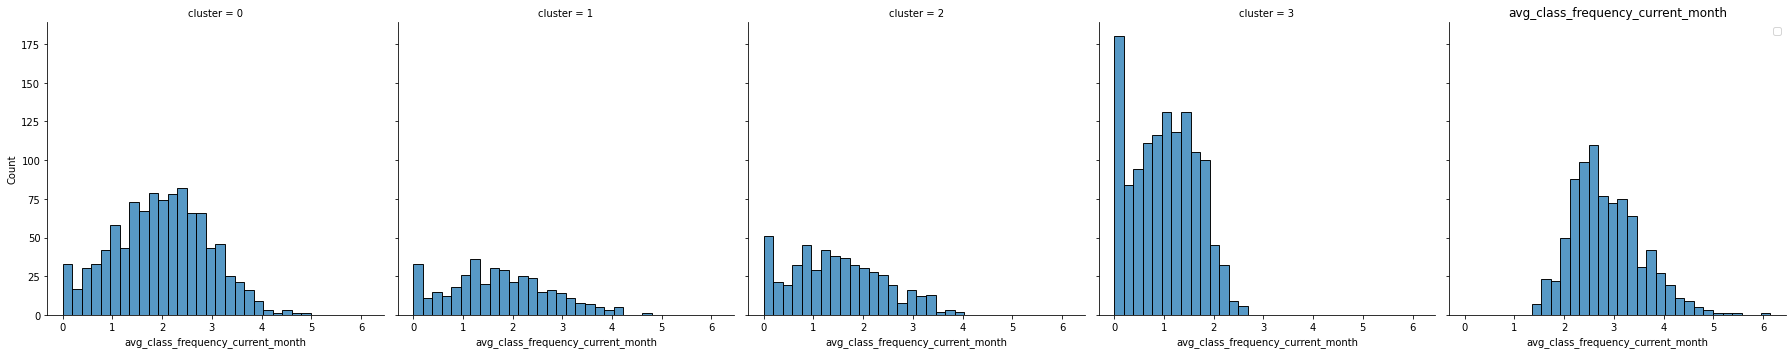

In [28]:
numerical_columns = ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']
for column in numerical_columns:
    plt.figure(figsize=(12, 4))
    sns.displot(x=data[column], col="cluster", data=data)
    plt.title(column)
    plt.legend()
    plt.show()

### Распределение признаков для кластера 0.

In [29]:
# сохраним списки категорийных и числовых переменных в переменных
categorical_columns = ['gender','near_location','partner','promo_friends','phone','group_visits','churn']
numerical_columns = ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


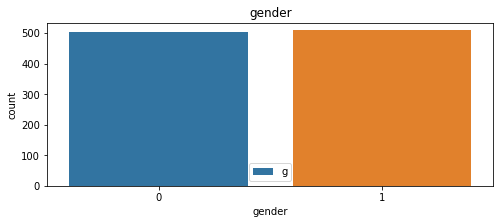

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


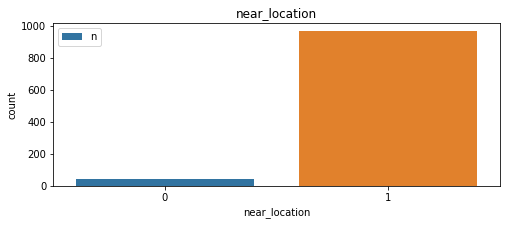

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


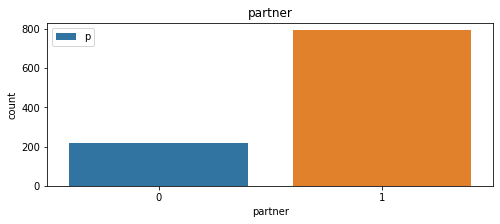

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


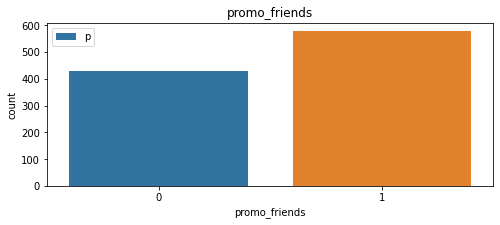

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


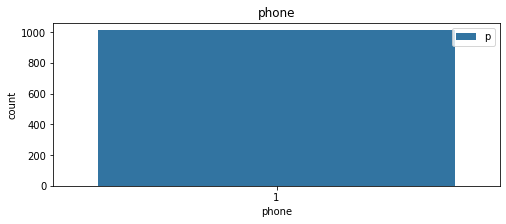

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


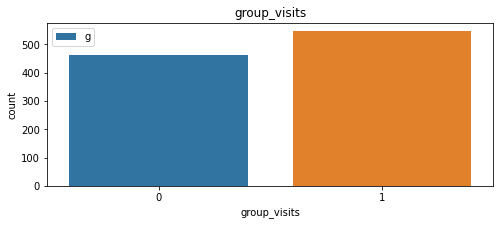

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


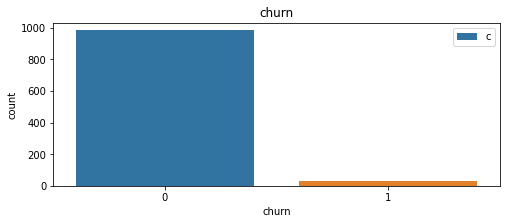

In [30]:
# выведем графики категорийных признаков кластера 0
df= data.query('cluster==0')
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()

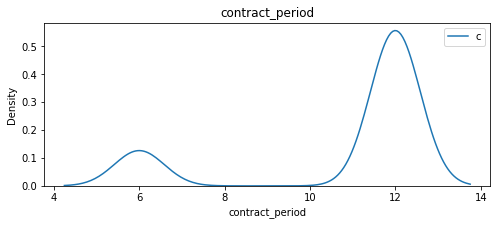

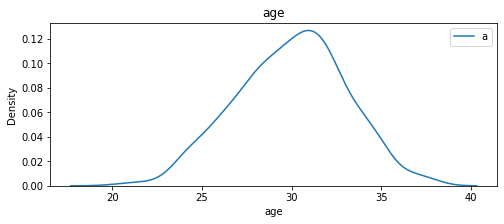

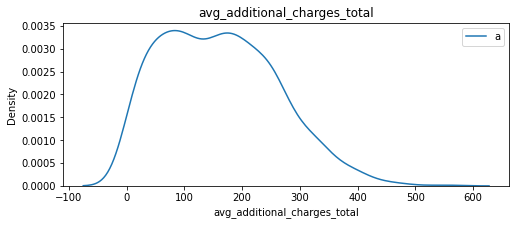

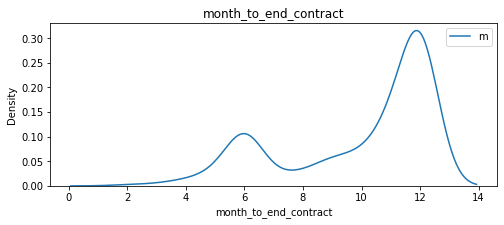

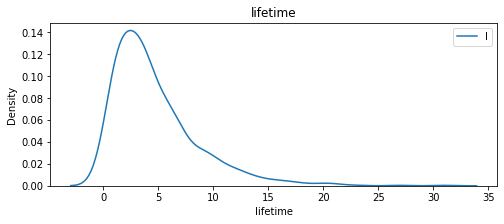

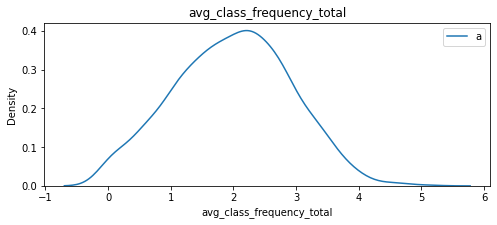

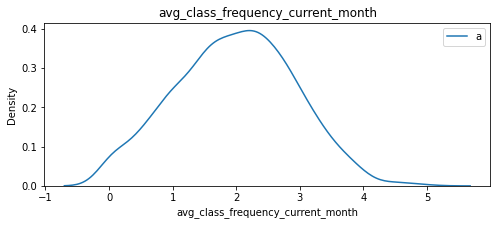

In [31]:
# выведем графики численных признаков кластера 0
df= data.query('cluster==0')
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()


###  Распределение признаков для кластера 1

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


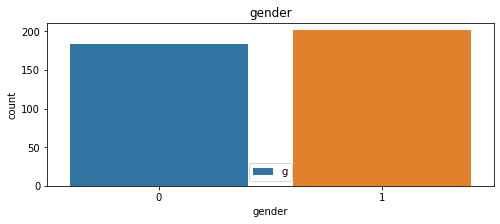

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


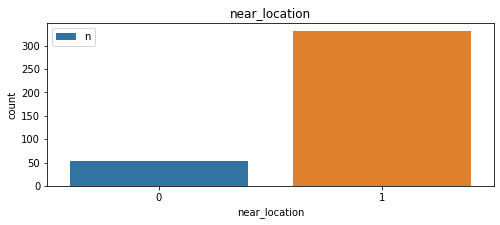

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


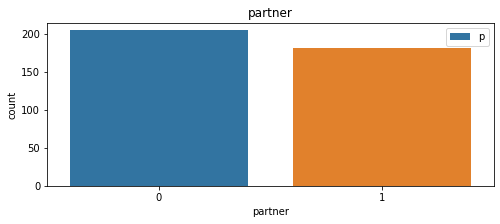

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


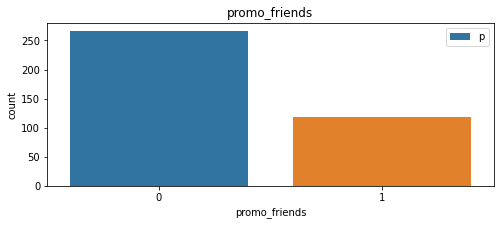

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


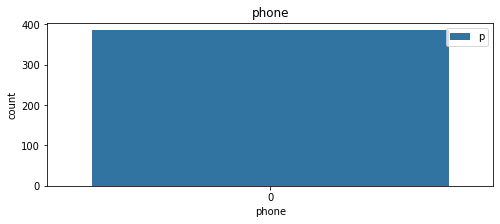

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


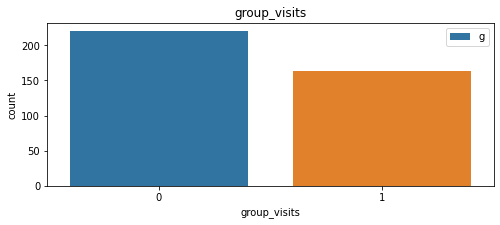

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


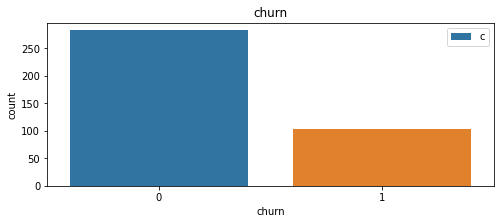

In [32]:
# выведем графики категорийных признаков кластера 1
df= data.query('cluster==1')
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()

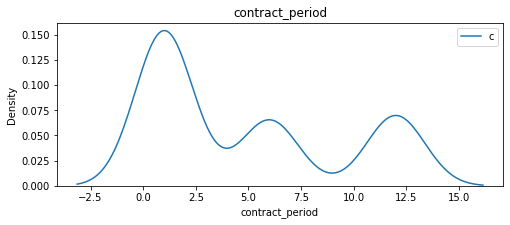

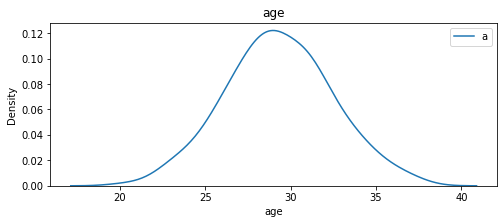

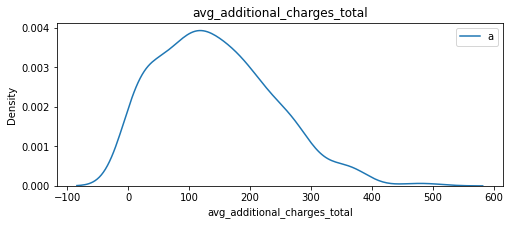

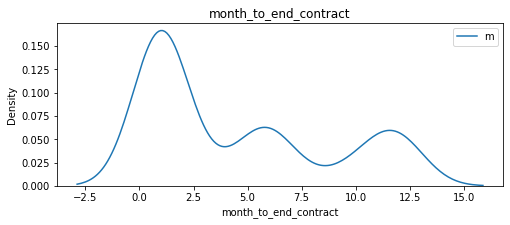

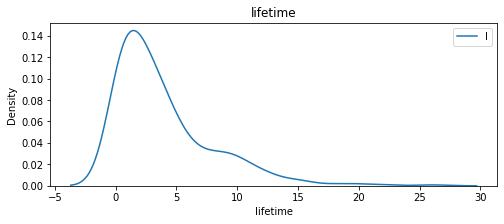

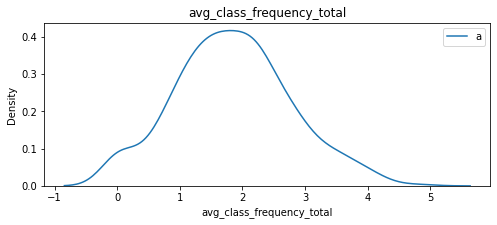

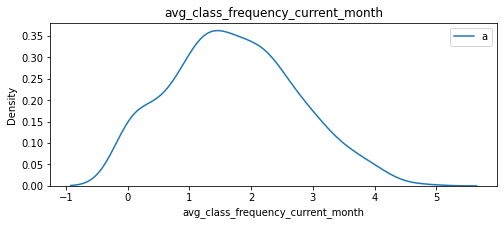

In [33]:
# выведем графики категорийных признаков кластера 1
df= data.query('cluster==1')
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()


### Распределение признаков для кластера 2.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


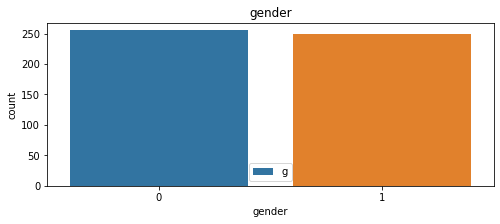

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


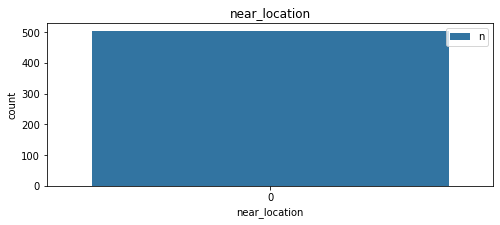

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


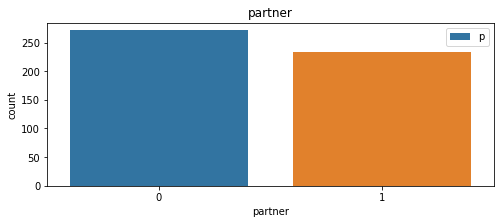

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


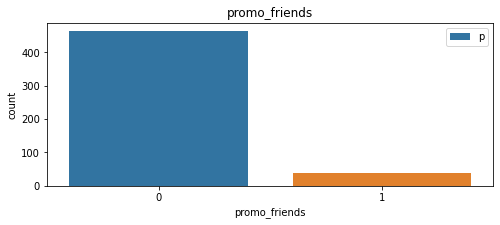

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


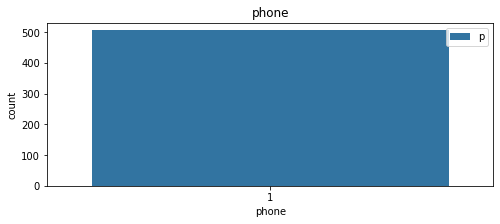

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


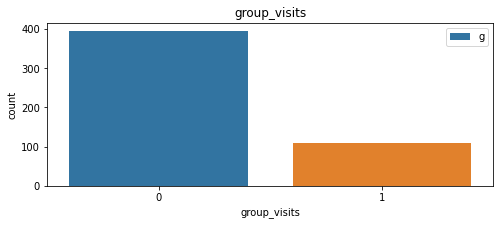

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


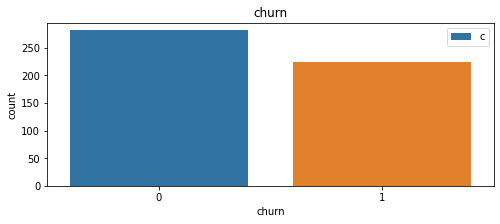

In [34]:
# выведем графики категорийных признаков кластера 2
df= data.query('cluster==2')
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()

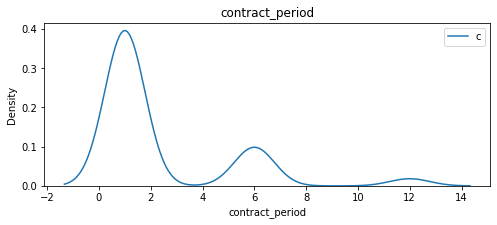

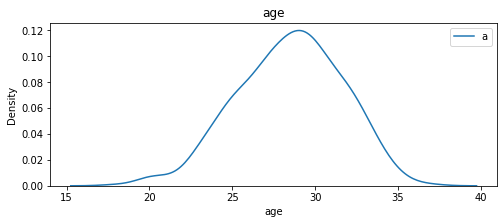

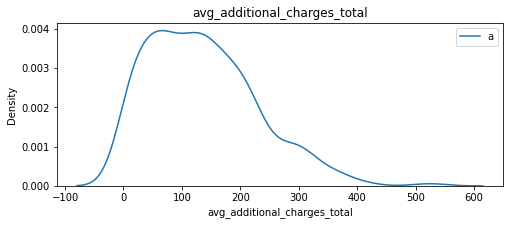

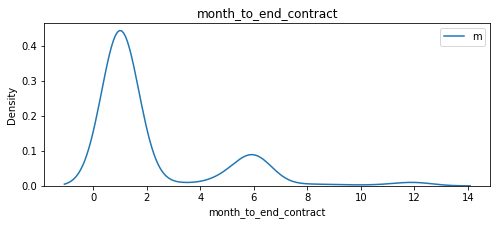

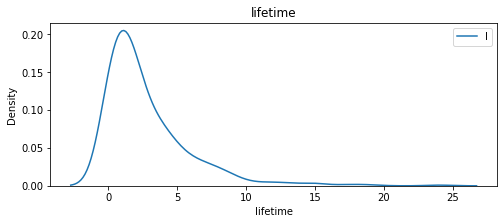

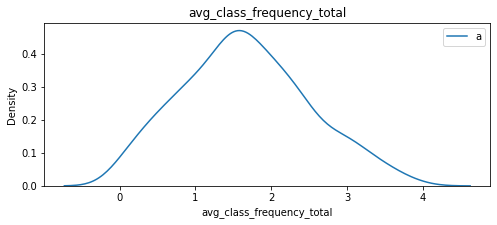

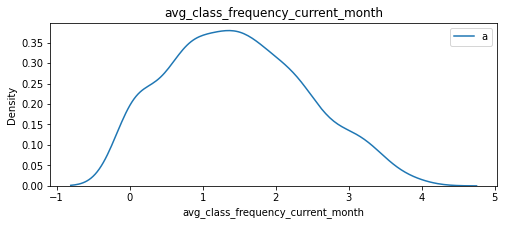

In [35]:
# выведем графики категорийных признаков кластера 2
df= data.query('cluster==2')
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()


### Распределение признаков для кластера 3.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


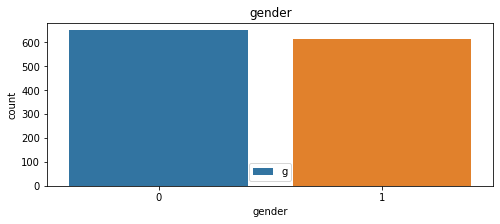

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


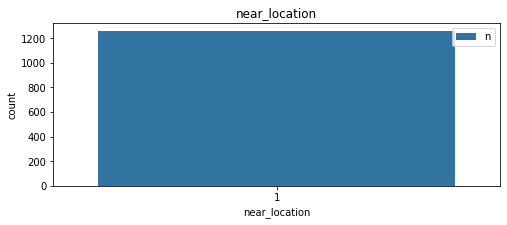

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


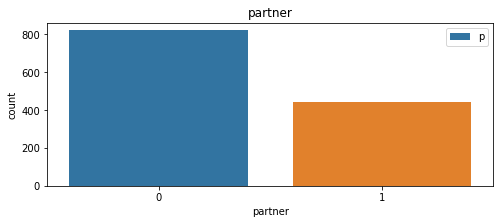

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


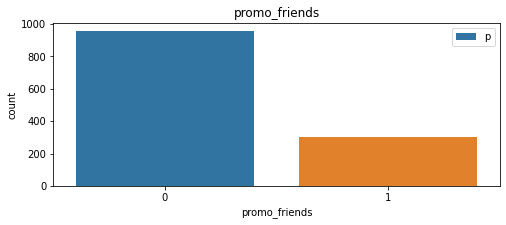

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


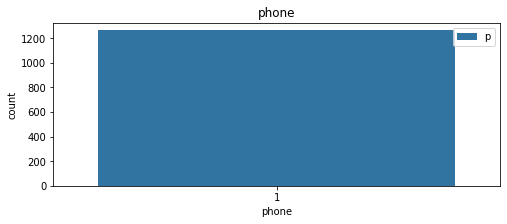

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


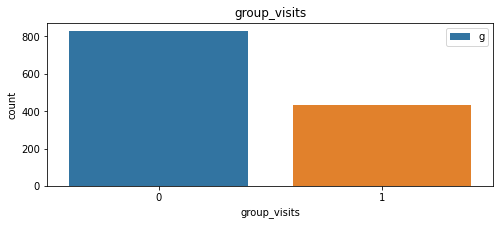

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


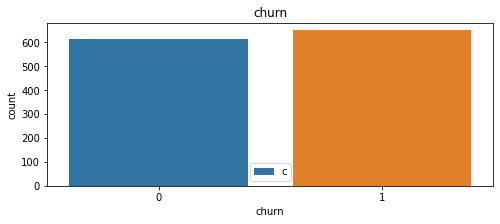

In [36]:
# выведем графики категорийных признаков кластера 3
df= data.query('cluster==3')
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()

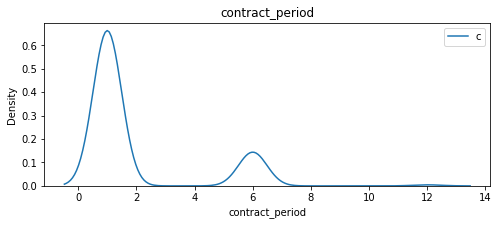

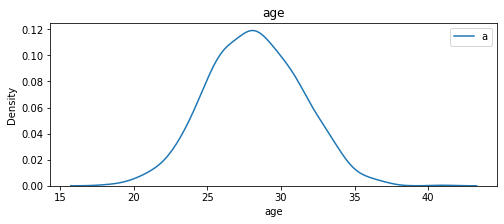

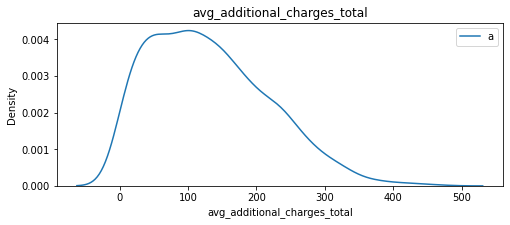

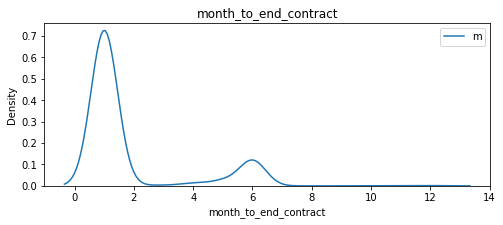

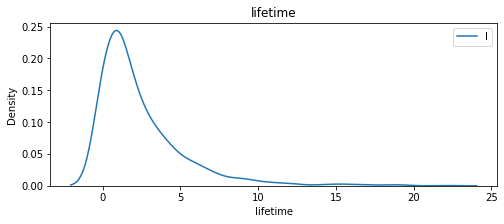

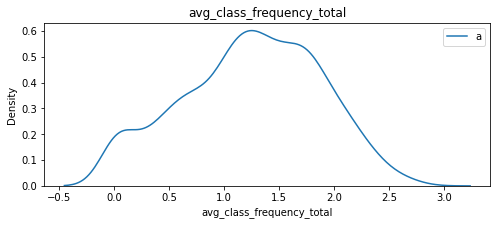

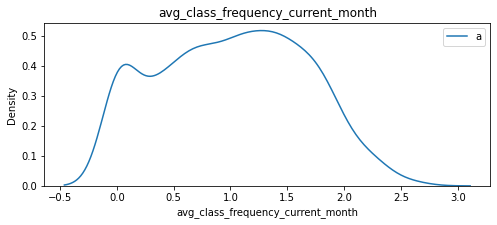

In [37]:
# выведем графики категорийных признаков кластера 3
df= data.query('cluster==3')
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()


### Распределение признаков для кластера 4.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


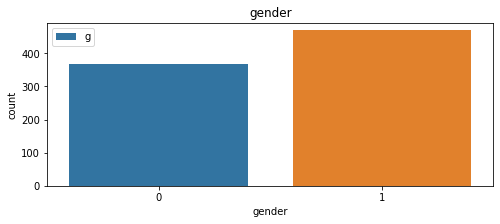

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


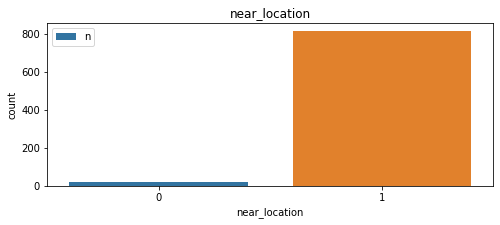

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


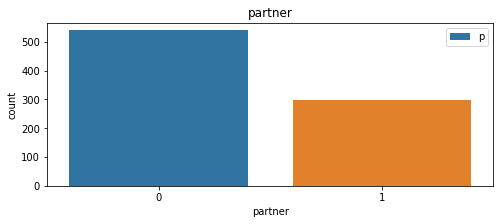

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


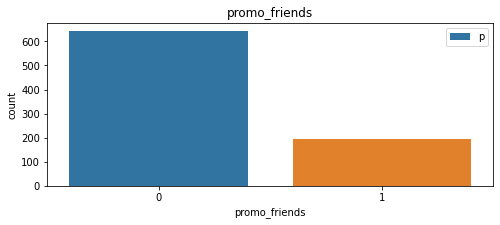

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


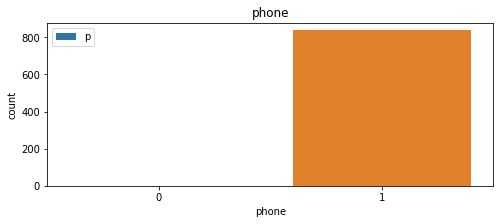

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


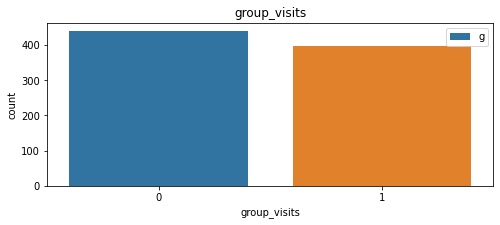

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


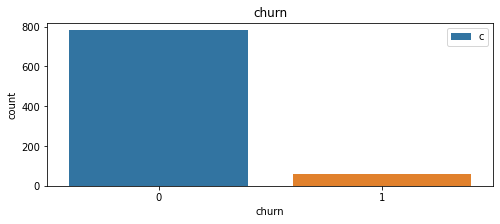

In [38]:
# выведем графики категорийных признаков кластера 4
df= data.query('cluster==4')
for column in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()

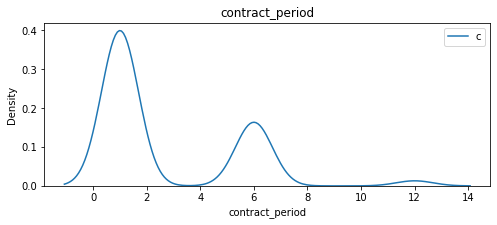

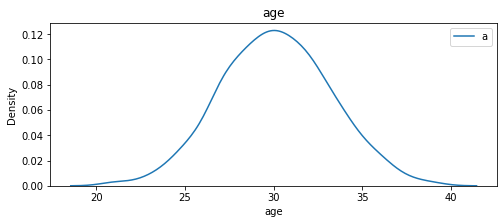

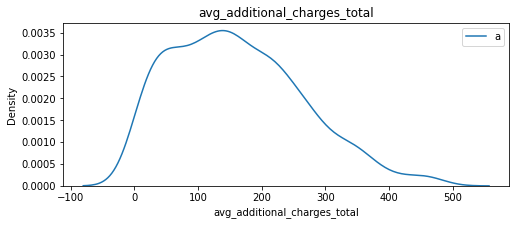

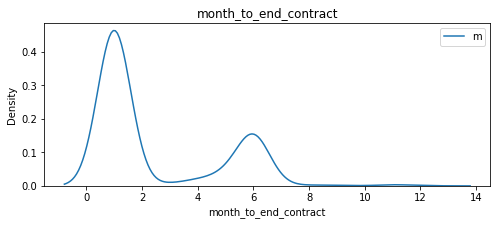

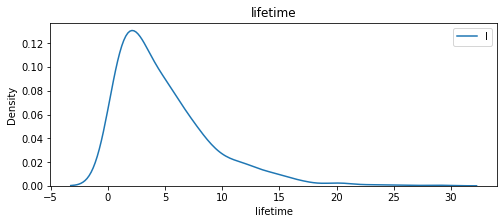

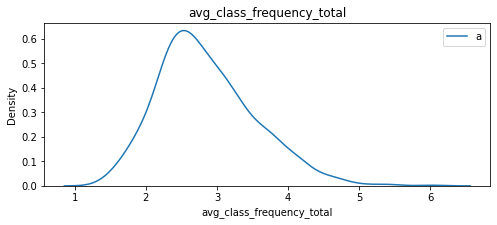

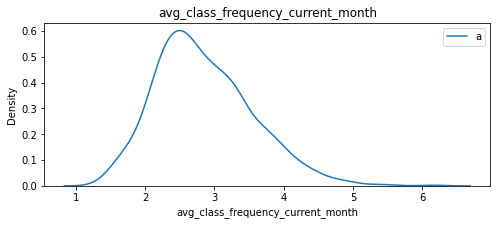

In [39]:
# выведем графики категорийных признаков кластера 4
df= data.query('cluster==4')
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(df[column])
    plt.title(column)
    plt.legend(column)
    plt.show()


In [40]:
#  выведем средние показатели по кластерам
data.groupby(by='cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


* Промежуточный вывод

При анализе признаков в кластерах, обнаружены общие черты для каждого кластера:
* кластер 0 - наиболее "сильные" общие признаки - сотрудник компании-партнёра и доля пришедших по промо-коду друзей,приобретают абонементы на длительный срок, среднее количество занятий в неделю - более двух;

* кластер 1 - наиболее "сильные" общие признаки -  не предоставлен контактный номер телефона,приобретают абонементы на месяц, среднее количество занятий в неделю - около двух;

* кластер 2 - наиболее "сильные" общие признаки - **все** посетители не живут и не работают рядом с фитнес-центром, а также самый низкий процент посетителей с пром-кодом от друзей,приобретают абонементы на месяц, реже на полгода, среднее количество занятий в неделю - более одного;

* кластер 3 - наиболее "сильные" общие признаки -  **все** посетители живут или работают рядом с фитнес-центром и наименьшее количество мужчин и сотрудников компании-партнёра,приобретают абонементы на месяц, реже на полгода, среднее количество занятий в неделю - одно;

* кластер 4 - наиболее "сильные" общие признаки - наибольшая доля мужчин старше 30 и  наименьшая доля посетителей с промо-кодом «приведи друга», приобретают абонементыв основном на месяц, среднее количество занятий в неделю - более 2 .



### Для каждого полученного кластера посчитаем долю оттока (методом groupby())

In [41]:
#посчитаем долю оттока для каждого кластера
data.groupby(
    ['cluster','churn']).agg({'churn': 'count'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


churn
cluster churn           
0       0      97.227723
        1       2.772277
1       0      73.246753
        1      26.753247
2       0      55.643564
        1      44.356436
3       0      48.573693
        1      51.426307
4       0      93.198091
        1       6.801909

### * Промежуточный вывод

Наибольшая доля оттока в кластере 3 - отток более 51%,

за ним следует кластер 2 - отток 44%, 

а самые надёжные посетители вошли в кластеры 0 и 4 - отток менее 3% и менее 7% соответственно,

немногим уступают им посетители вошедшие в кластер 1 - отток более 26%.

# Общий вывод.

Во время работы над проектом были использованы:

приёмы и методы машинного обучения моделей,

стандартизация,классификация и кластеризация данных,

а также инструменты визуализации.

В результате анализа представленных данных о посетителях фитнес-центра установлено следующее:

* в группе посетителей попавших в  отток средний показатель посещений в последнем перед оттоком месяце значительно снижен (около 30%);

* значительное количество клиентов приходит со стороны компаний-партнёров (чуть менее 50%) и отток среди них в 1,5 раза ниже чем в других группах;

* среди клиентов пришедших по промо-коду «приведи друга» (более 25 %) попало в отток вдвое меньше чем в остальных группах;

* хотя большинство посетителей предпочитают индивидуальные тренировки, среди любителей групповых посещений отток  в 1,8 раз ниже, чем в других группах;

* наибольшее количество клиентов находятся в возрастной группе 27-31 год, средний возраст попавших в отток- 26 лет.


 На основании полученных результатов можно рекомендовать  отделу маргетинга сконцентрироваться на следующих направлениях:
 
 * расширять сеть  компаний-партнёров в бизлежащих к фитнес-центру районах;
 
 * акцию «приведи друга» можно проводить регулярно;
 
 * рекламную кампанию размещать в районе прилегающем к фитнес-центру;
 
 * в рекламной кампании сделать акцент на мужчин возраста 30+ ;
 
 * вовлекать посетителей в групповые посещения.
